# Histograms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set() # ; means seperate line of code

<hr>
<br>
<br>

## How has the NBA changed since 1950?

#### Load Seasons Data

In [2]:
nba = pd.read_csv("../data/nba_1950/season_stats.csv")

#### But first, Quick Exploration of the dataset.

[Data Dictionary](https://www.basketball-reference.com/about/glossary.html)

In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 52 columns):
Year      24624 non-null float64
Player    24624 non-null object
Pos       24624 non-null object
Age       24616 non-null float64
Tm        24624 non-null object
G         24624 non-null float64
GS        18233 non-null float64
MP        24138 non-null float64
PER       24101 non-null float64
TS%       24538 non-null float64
3PAr      18839 non-null float64
FTr       24525 non-null float64
ORB%      20792 non-null float64
DRB%      20792 non-null float64
TRB%      21571 non-null float64
AST%      22555 non-null float64
STL%      20792 non-null float64
BLK%      20792 non-null float64
TOV%      19582 non-null float64
USG%      19640 non-null float64
blanl     0 non-null float64
OWS       24585 non-null float64
DWS       24585 non-null float64
WS        24585 non-null float64
WS/48     24101 non-null float64
blank2    0 non-null float64
OBPM      20797 non-null float64
DBPM      2

#### Lets look at a few of the rows.

In [4]:
nba.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


#### What are some things that you notice right off the bat?

In [5]:
nba.tail(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24681,2017.0,Delon Wright,PG,24.0,TOR,27.0,0.0,446.0,15.0,0.535,...,0.764,16.0,32.0,48.0,57.0,27.0,11.0,25.0,31.0,150.0
24682,2017.0,James Young,SG,21.0,BOS,29.0,0.0,220.0,10.0,0.549,...,0.667,6.0,20.0,26.0,4.0,10.0,2.0,4.0,15.0,68.0
24683,2017.0,Joe Young,PG,24.0,IND,33.0,0.0,135.0,11.4,0.433,...,0.733,1.0,16.0,17.0,15.0,4.0,0.0,5.0,5.0,68.0
24684,2017.0,Nick Young,SG,31.0,LAL,60.0,60.0,1556.0,14.1,0.588,...,0.856,25.0,112.0,137.0,58.0,37.0,14.0,36.0,137.0,791.0
24685,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,0.562,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


<br>

In [10]:
nba[nba["Player"] == "Michael Jordan"]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


### Shooting Percentage

#### Use pandas `.value_counts()` to look at the distribution of `TS%`.

In [6]:
shoot_percentage = nba['TS%'].value_counts()
shoot_percentage.head()

0.500    235
0.000    201
0.521    188
0.533    186
0.530    182
Name: TS%, dtype: int64

#### Use pandas `.hist()` method to visualize distribution of `TS%`

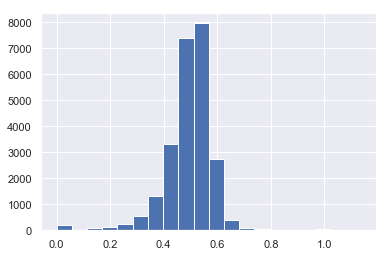

In [13]:
nba['TS%'].hist(bins=20)

# # Make it pretty
# ax = plt.gca()
# ax.set_title("True Shooting % Across all NBA Seasons")
# ax.set_xlabel("True Shooting Percentage")
# ax.set_ylabel("# of Players")

# # "print" the plot
# plt.show()

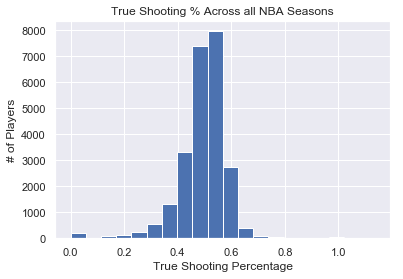

In [15]:
nba['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca() # Get the current Axes instance on the current figure
ax.set_title("True Shooting % Across all NBA Seasons")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

<br>

### Prep work for Answering Question. 

In [16]:
first_year = nba['Year'].min()
last_year = nba['Year'].max()
print(first_year)
print(last_year)

1950.0
2017.0


In [17]:
nba_1950 = nba[nba['Year'] == first_year]
nba_2017 = nba[nba['Year'] == last_year]

<br>

### Shooting Percentage in 1950

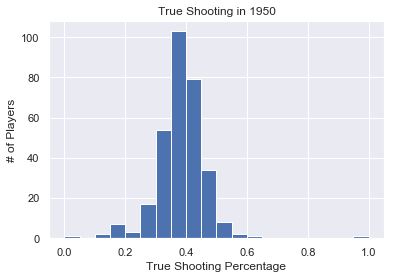

In [19]:
nba_1950['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting in 1950")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

<br>

### Shooting Percentage in 2017

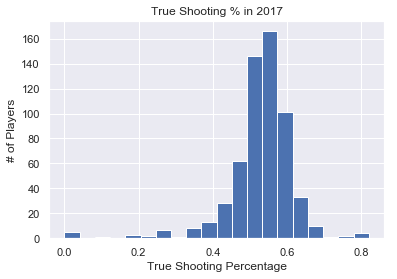

In [20]:
nba_2017['TS%'].hist(bins=20)

# Make it pretty
ax = plt.gca()
ax.set_title("True Shooting % in 2017")
ax.set_xlabel("True Shooting Percentage")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

<br>

#### Using only the data from the Histograms for both years... What has happened to the True Shooting Percentage between 1950 and 2017?

In [28]:
print(nba_2017['TS%'].mean())
print(nba_2017['TS%'].median())
print(nba_2017['TS%'].var())
print(nba_1950['TS%'].mean())
print(nba_1950['TS%'].median())
print(nba_1950['TS%'].var())

print(nba_2017['TS%'].mean() - nba_1950['TS%'].mean() )
print(nba_2017['TS%'].mean() / nba_1950['TS%'].mean() ) # .37 percent better 

0.5267993254637435
0.537
0.008770248513057745
0.38403205128205126
0.385
0.006616976461373565
0.14276727418169227
1.371758746971974


# short answer
We can see that the True Shooting Percentage has shifted over the different years.
The avg True Shooting Percentage has increased by 14 percent 

In [33]:
nba_1950['TS%'].value_counts().sort_index(ascending=False)

1.000    1
0.608    1
0.592    1
0.579    1
0.548    1
0.515    1
0.513    1
0.507    1
0.506    1
0.503    1
0.502    1
0.500    1
0.498    1
0.497    1
0.496    1
0.493    1
0.492    1
0.491    1
0.487    2
0.486    1
0.485    1
0.484    1
0.480    1
0.479    2
0.472    2
0.471    3
0.470    1
0.467    1
0.466    2
0.464    1
        ..
0.303    2
0.302    3
0.295    1
0.294    1
0.293    1
0.292    1
0.291    1
0.290    2
0.289    1
0.281    2
0.278    1
0.277    1
0.275    1
0.268    1
0.266    1
0.262    1
0.257    1
0.242    1
0.230    1
0.218    1
0.198    1
0.196    1
0.190    1
0.184    1
0.183    1
0.182    1
0.170    1
0.131    1
0.121    1
0.000    1
Name: TS%, Length: 177, dtype: int64

In [35]:
nba_2017['TS%'].value_counts().sort_index(ascending=False).head(10)

0.820    1
0.799    1
0.798    2
0.773    1
0.753    1
0.703    1
0.688    1
0.682    2
0.677    1
0.676    1
Name: TS%, dtype: int64

In [50]:
top_tsp_index = nba_1950[nba_1950['TS%'] == 1.00].index.values[0]
nba_1950.iloc[top_tsp_index, :]

nba_1950[nba_1950['TS%'] == 1.00]["Player"]

nba_1950.iloc[nba_1950['TS%'].idxmax()]
nba_1950['TS%'].idxmax()

nba["Player"].iloc[nba_1950["TS%"].idxmax()]

# top_tsp_index = nba_1950['TS%'].sort_values(ascending=False).index[0]
# nba_1950.iloc[top_tsp_index, :]['Player']

'Normie Glick'

<hr>
<br>
<br>

## Does The College that a player attended affect performance in NBA?

#### Load Player Data

In [52]:
players = pd.read_csv('../data/nba_1950/player_data.csv')
players

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


In [61]:
top_5_colleges = ['University of Kentucky',
                  'Duke University',
                  'University of Kansas',
                  'Syracuse University',
                  'University of California, Los Angeles']

## Indexing a col based on a list of values 

In [62]:
players["college"] == 'University of Kentucky'
players["college"] == 'Duke University'
print()

#### Lets take a look at `college` column of `players`

In [63]:
players['college'].value_counts().head(10)

University of Kentucky                   99
University of California, Los Angeles    91
University of North Carolina             87
University of Kansas                     72
Duke University                          71
Indiana University                       60
University of Notre Dame                 56
University of Louisville                 55
University of Arizona                    51
St. John's University                    51
Name: college, dtype: int64

#### We'll use Pandas `.isin()` method to check `college` column against 

#### `top_5_colleges` list.

In [64]:
players['college'].isin(top_5_colleges) # loop through and see if a value in list of values is in the data frame

0        True
1       False
2        True
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22       True
23       True
24      False
25      False
26       True
27      False
28      False
29      False
        ...  
4520     True
4521    False
4522    False
4523    False
4524    False
4525    False
4526    False
4527    False
4528    False
4529    False
4530    False
4531    False
4532    False
4533    False
4534    False
4535    False
4536    False
4537    False
4538    False
4539    False
4540    False
4541     True
4542    False
4543    False
4544    False
4545    False
4546    False
4547    False
4548    False
4549    False
Name: college, Length: 4550, dtype: bool

In [68]:
in_top_5_colleges = players['college'].isin(top_5_colleges)
print(in_top_5_colleges)
players[in_top_5_colleges]

0        True
1       False
2        True
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22       True
23       True
24      False
25      False
26       True
27      False
28      False
29      False
        ...  
4520     True
4521    False
4522    False
4523    False
4524    False
4525    False
4526    False
4527    False
4528    False
4529    False
4530    False
4531    False
4532    False
4533    False
4534    False
4535    False
4536    False
4537    False
4538    False
4539    False
4540    False
4541     True
4542    False
4543    False
4544    False
4545    False
4546    False
4547    False
4548    False
4549    False
Name: college, Length: 4550, dtype: bool


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
19,Jordan Adams,2015,2016,G,6-5,209.0,"July 8, 1994","University of California, Los Angeles"
22,Rafael Addison,1987,1997,F-G,6-7,215.0,"July 22, 1964",Syracuse University
23,Bam Adebayo,2018,2018,C-F,6-10,243.0,"July 18, 1997",University of Kentucky
26,Arron Afflalo,2008,2018,G,6-5,210.0,"October 15, 1985","University of California, Los Angeles"
36,Mark Alarie,1987,1991,F,6-8,217.0,"December 11, 1963",Duke University
39,Cole Aldrich,2011,2018,C,6-11,250.0,"October 31, 1988",University of Kansas
42,Cliff Alexander,2016,2016,F,6-8,245.0,"November 16, 1995",University of Kansas
55,Lucius Allen,1970,1979,G,6-2,175.0,"September 26, 1947","University of California, Los Angeles"


#### Index `players` by `in_top_5_colleges` and grab `name`

In [69]:
# index entire players df by "in_top_5"
players_in_top_5 = players[in_top_5_colleges]['name']
players_in_top_5.head(20)

0           Alaa Abdelnaby
2      Kareem Abdul-Jabbar
19            Jordan Adams
22          Rafael Addison
23             Bam Adebayo
26           Arron Afflalo
36             Mark Alarie
39            Cole Aldrich
42         Cliff Alexander
55            Lucius Allen
63          Darrell Allums
81          Derek Anderson
91           Kyle Anderson
102           Ike Anigbogu
107        Carmelo Anthony
120           Trevor Ariza
129         Tate Armstrong
134         Darrell Arthur
153          William Avery
157       Kelenna Azubuike
Name: name, dtype: object

<br>

#### We'll use Pandas `.isin()` method to check `players` column in `nba` 
#### against the `players_in_top_5` series we just constructed.

In [70]:
in_top_colleges = nba['Player'].isin(players_in_top_5)

In [73]:
in_top_colleges

0        False
1         True
2        False
3        False
4        False
5        False
6         True
7        False
8         True
9         True
10        True
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
24661    False
24662    False
24663    False
24664    False
24665    False
24666    False
24667    False
24668    False
24669    False
24670    False
24671    False
24672    False
24673    False
24674    False
24675    False
24676     True
24677     True
24678    False
24679    False
24680    False
24681    False
24682     True
24683    False
24684    False
24685    False
24686    False
24687    False
24688    False
24689    False
24690    False
Name: Player, Length: 24691, dtype: bool

<br>

#### We will divide all of the rows of `nba` into `2` dataframes, those players who attended the top colleges, and those who did not.

In [74]:
top_college = nba[in_top_colleges]
top_college.shape

(2198, 52)

In [75]:
bottom_college = nba[~in_top_colleges]
bottom_college.shape

(22493, 52)

<br>

#### Plot the Players NOT FROM Top 5

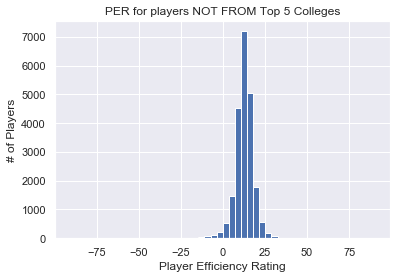

In [76]:
bottom_college['PER'].hist(bins=50) 

# Make it pretty
ax = plt.gca()
ax.set_title("PER for players NOT FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

In [78]:
bottom_college['PER'].mean()

12.484063127166582

#### Plot the Players FROM Top 5

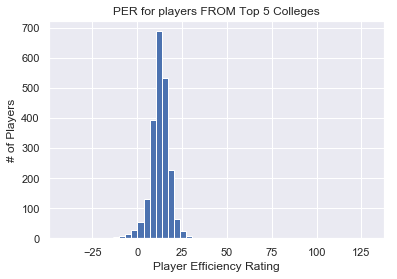

In [77]:
top_college['PER'].hist(bins=50) 

# Make it pretty
ax = plt.gca()
ax.set_title("PER for players FROM Top 5 Colleges")
ax.set_xlabel("Player Efficiency Rating")
ax.set_ylabel("# of Players")

# "print" the plot
plt.show()

In [79]:
top_college['PER'].mean()

12.428801102434512

In [ ]:
top_college = nba_1950['Player'].isin(players
bottom_college = nba_2017[~in_top_colleges]
temp1 = 
temp2 = 

#### What conclusions can we draw about these 2 groups?

In [ ]:
# What could we do better? ...